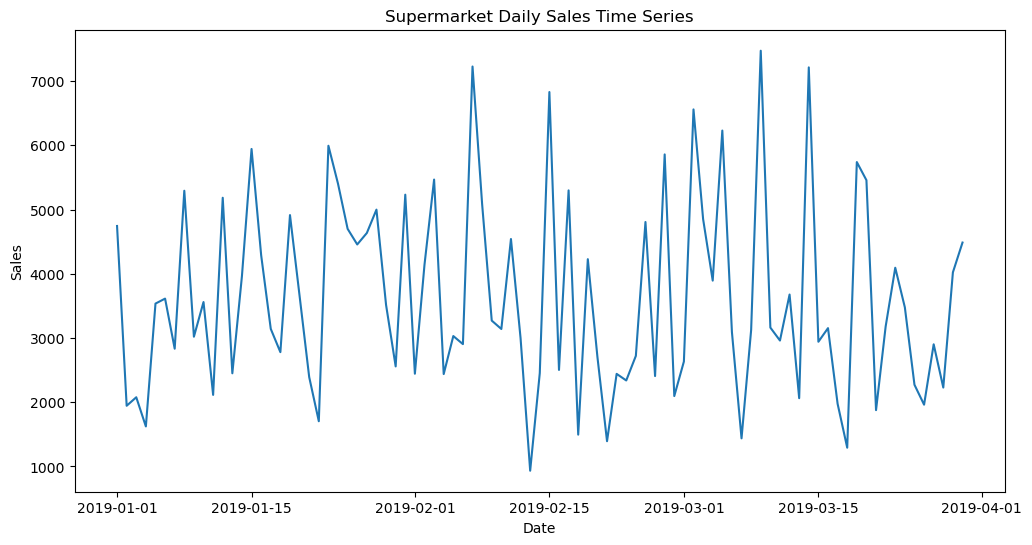

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# 1. Data Loading and Preprocessing
# Load the dataset
import pandas as pd

try:
    df = pd.read_csv("/Users/bahaarahuja/Desktop/supermarket_sales - Sheet1.csv")  # Use the correct path
except FileNotFoundError:
    print("Error: supermarket_sales - Sheet1.csv not found. Make sure the file is in the correct directory.")
    exit()

# Data Cleaning and Preprocessing
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract relevant features: Sales and Date
sales_data = df[['Date', 'Total']]
sales_data = sales_data.rename(columns={'Total': 'Sales'}) # Rename column for consistency

# Aggregate sales data by date (summing sales for each day)
daily_sales = sales_data.groupby('Date')['Sales'].sum()
daily_sales = pd.DataFrame(daily_sales) # Convert series to dataframe

# Visualize daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Sales'])
plt.title('Supermarket Daily Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()



<Figure size 1200x800 with 0 Axes>

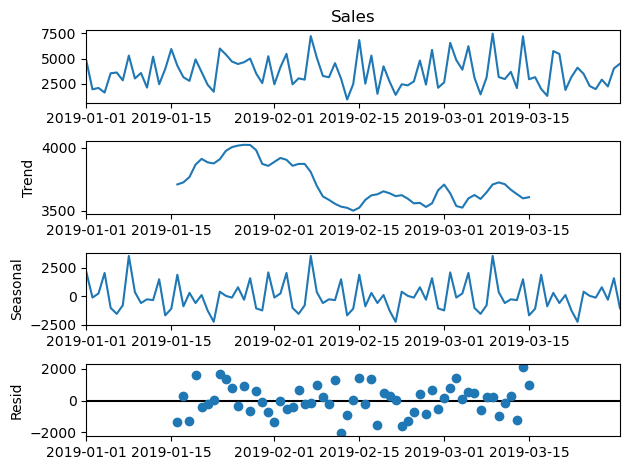

In [2]:
# 2. Time Series Decomposition 
# Decompose the time series to observe trends, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(daily_sales['Sales'], model='additive', period=30) # Assuming monthly seasonality

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


In [3]:
# 3. Train-Test Split
# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(daily_sales) * 0.8)
train_data = daily_sales[:train_size]
test_data = daily_sales[train_size:]


In [4]:
# 4. ARIMA Model Training
# Determine the order (p, d, q) of the ARIMA model (using ACF/PACF or auto_arima)
order = (5, 1, 0)

# Train the ARIMA model
model = ARIMA(train_data['Sales'], order=order)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   71
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -616.431
Date:                Sat, 08 Feb 2025   AIC                           1244.862
Time:                        23:49:19   BIC                           1258.353
Sample:                    01-01-2019   HQIC                          1250.220
                         - 03-12-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8733      0.157     -5.555      0.000      -1.181      -0.565
ar.L2         -0.7625      0.183     -4.172      0.000      -1.121      -0.404
ar.L3         -0.5356      0.165     -3.254      0.0

/Users/bahaarahuja/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/bahaarahuja/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/bahaarahuja/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [5]:
# 5. Prediction
# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))
predictions = pd.Series(predictions, index=test_data.index)

In [6]:
# 6. Evaluation
# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_data['Sales'], predictions))
print(f'RMSE: {rmse}')

RMSE: 1695.1942236494326


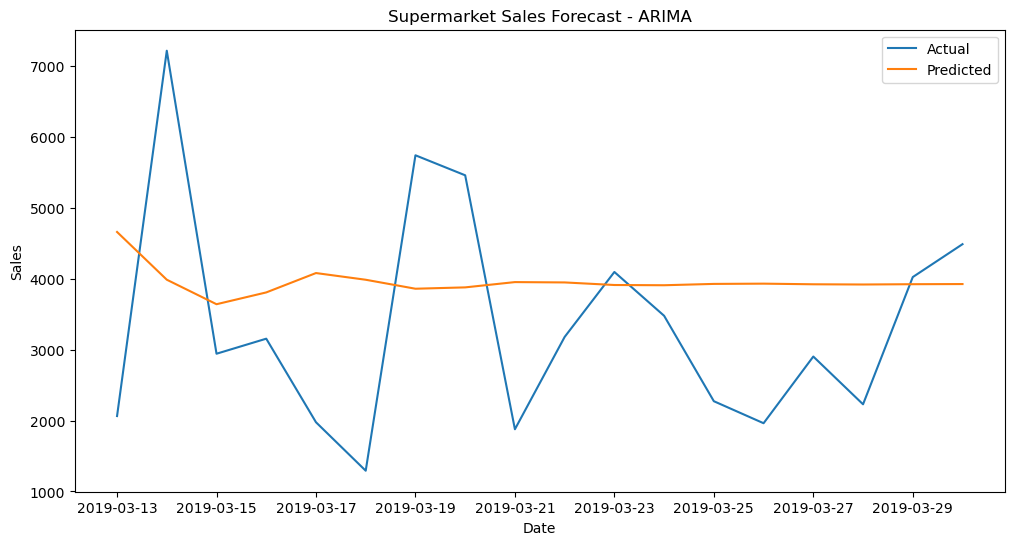

In [7]:
# 7. Visualization of Results
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Sales'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Supermarket Sales Forecast - ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

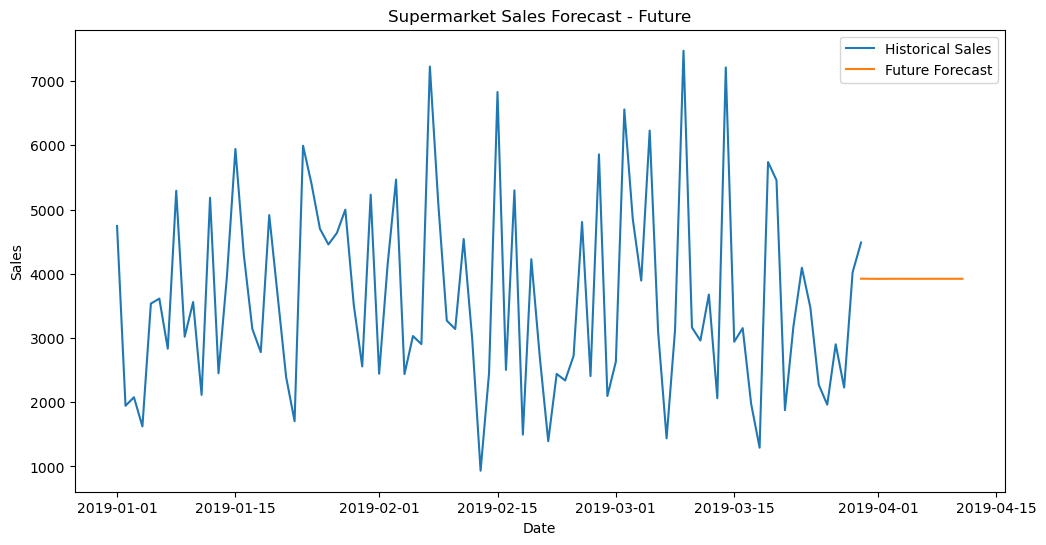

In [8]:
# 8. Future Forecasting 
# Forecast sales for the next few months
future_forecast = model_fit.forecast(steps=30)  # Forecast 30 days into the future
future_forecast = pd.Series(future_forecast, index=pd.date_range(start=daily_sales.index[-1], periods=30, freq='D'))

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Sales'], label='Historical Sales')
plt.plot(future_forecast, label='Future Forecast')
plt.title('Supermarket Sales Forecast - Future')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

# Basic data cleaning (handle missing values if any)
df = df.fillna(df.mean(numeric_only=True)) #Fills missing numeric values

# Display basic info about the dataset
print(df.info())
print(df.head())
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

#Time of Day Buckets
def categorize_time(time):
    hour = time.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
df['Time_Category'] = df['Time'].apply(categorize_time)

#Create Sales per Customer
df['Sales_per_Quantity'] = df['Total'] / df['Quantity']
df['Sales_per_Quantity'] = df['Sales_per_Quantity'].replace([float('inf'), float('-inf')], 0)

#Weekend Indicator:
df['Weekend'] = df['Date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [10]:
# Encode categorical features
categorical_cols = ['Gender', 'Customer type', 'Payment', 'Product line', 'City', 'Day_of_Week', 'Month', 'Branch', 'Time_Category']
label_encoders = {}  # Store LabelEncoders for later use

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le # Store the encoder

print(df.head())


    Invoice ID  Branch  City  Customer type  Gender  Product line  Unit price  \
0  750-67-8428       0     2              0       0             3       74.69   
1  226-31-3081       2     1              1       0             0       15.28   
2  631-41-3108       0     2              1       1             4       46.33   
3  123-19-1176       0     2              0       1             3       58.22   
4  373-73-7910       0     2              1       1             5       86.31   

   Quantity   Tax 5%     Total  ... Payment    cogs  gross margin percentage  \
0         7  26.1415  548.9715  ...       2  522.83                 4.761905   
1         5   3.8200   80.2200  ...       0   76.40                 4.761905   
2         7  16.2155  340.5255  ...       1  324.31                 4.761905   
3         8  23.2880  489.0480  ...       2  465.76                 4.761905   
4         7  30.2085  634.3785  ...       2  604.17                 4.761905   

   gross income  Rating  Day_of_

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# Select features and target variable
features = ['Quantity', 'Unit price', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage',
            'gross income', 'Gender', 'Customer type', 'Payment', 'Product line', 'City',
            'Day_of_Week', 'Month', 'Time_Category', 'Sales_per_Quantity', 'Weekend', 'Branch']  # Add more features as needed
target = 'Rating' #Changed to rating to demo different output

# Scale the data
scaler = StandardScaler()
X = df[features]
y = df[target]
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Feature Importance (for Linear Regression, you can look at coefficients)
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])  #For determining most important
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance (Linear Regression):")
print(feature_importance)

# Train a Random Forest Regressor model

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_rmse = sqrt(mean_squared_error(y_test, rf_y_pred))
print(f'Random Forest RMSE: {rf_rmse}')

# Extract feature importances
rf_feature_importance = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance (Random Forest):")
print(rf_feature_importance)

RMSE: 1.7905928731384342

Feature Importance (Linear Regression):
                    Feature   Coefficient  Abs_Coefficient
0                  Quantity  1.703672e-01     1.703672e-01
13                    Month -1.665653e-01     1.665653e-01
11                     City  1.226019e-01     1.226019e-01
12              Day_of_Week -9.216973e-02     9.216973e-02
3                     Total -7.203932e-02     7.203932e-02
2                    Tax 5% -7.203932e-02     7.203932e-02
4                      cogs -7.203932e-02     7.203932e-02
6              gross income -7.203932e-02     7.203932e-02
15       Sales_per_Quantity  6.906256e-02     6.906256e-02
1                Unit price  6.906256e-02     6.906256e-02
10             Product line -4.157682e-02     4.157682e-02
14            Time_Category -3.995935e-02     3.995935e-02
9                   Payment  2.898554e-02     2.898554e-02
7                    Gender -2.022723e-02     2.022723e-02
8             Customer type  1.778855e-02     1.7